# Explore here

In [46]:
#K means project    
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [47]:
# Load the dataset 
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)
df.head(10) 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [48]:
# Count zeros in the entire dataset 
zero_count = (df == 0).sum().sum()
print(f"Number of zeros: {zero_count}")

Number of zeros: 0


In [49]:
# Narrowing down to specific columns
narrowed_df = df[['MedInc', 'Latitude', 'Longitude']]

In [50]:
# Split the data into X and y
X = narrowed_df
y = df['MedHouseVal']

In [51]:
# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(narrowed_df)

In [52]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(scaled_features) 

KMeans(n_clusters=6, random_state=42)

In [53]:
# Add the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

In [54]:
# Visualize the Clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]   

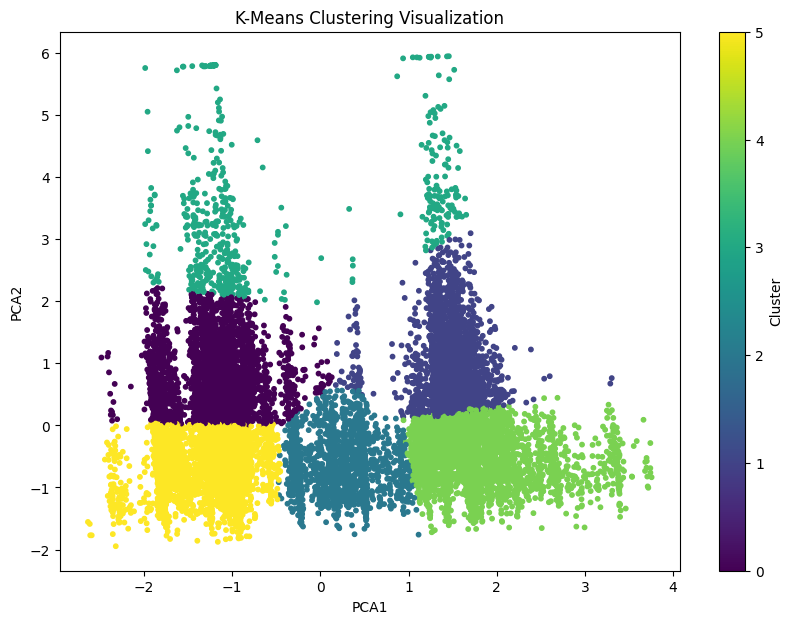

In [55]:
# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(df['pca1'], df['pca2'], c=kmeans.labels_, cmap='viridis', s=10)
plt.title("K-Means Clustering Visualization")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label='Cluster')
plt.show()  

In [56]:
# Making predictions with new data
new_data = np.array([[8.0, 37.88, -122.23], [3.0, 37.84, -122.25]])
new_data_scaled = scaler.transform(new_data)  # Scale the new data
predictions = kmeans.predict(new_data_scaled)
print("Cluster predictions for new data:", predictions) 

Cluster predictions for new data: [1 4]


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
